Nome: Felipe Faustino Brito

Matrícula: 2021007366

# Introdução a Filtros Digitais - Transformações Aproximadas

Considere o sistema cujo modelo de tempo contínuo é dado abaixo:

$$
𝐻(𝑠) = \frac{1000(s + 50)}{s^3 + 120s^2 + 4400s + 48000}
$$

### a) Obtenha o modelo discreto com taxa de amostragem de 200Hz usando o método ZOH.

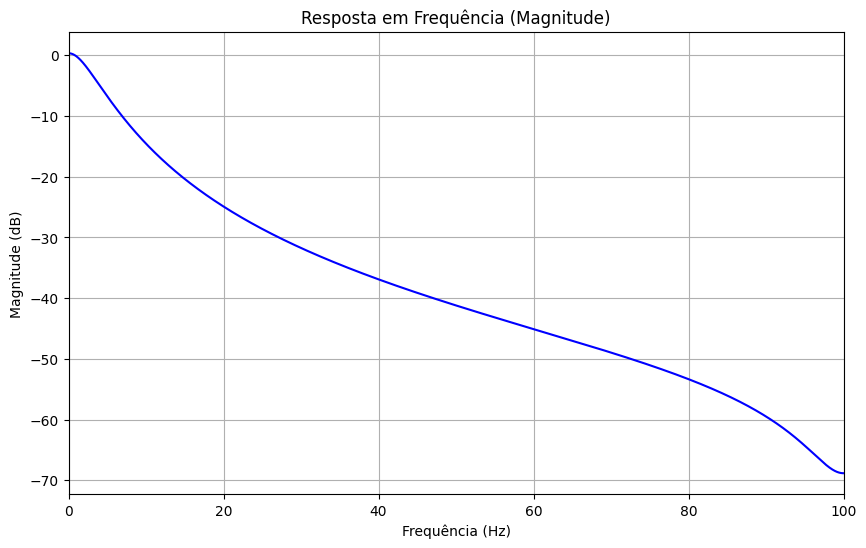

Função de transferência (discreta):
H(z) = (0.0111*z^(-0) + 0.0012*z^(-1) + -0.0077*z^(-2)) / (1.0000*z^(-0) + -2.4644*z^(-1) + 2.0177*z^(-2) + -0.5488*z^(-3))

Equação de diferenças:
1.0000*y[n-0] + -2.4644*y[n-1] + 2.0177*y[n-2] + -0.5488*y[n-3] = 0.0111*x[n-0] + 0.0012*x[n-1] + -0.0077*x[n-2]


In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

numerador_continuo = [1000, 50000]  # Numerador de H(s)
denominador_continuo = [1, 120, 4400, 48000]  # Denominador de H(s)

# Criar o sistema contínuo
sistema_continuo = signal.TransferFunction(numerador_continuo, denominador_continuo)

# 2. Definir o Período de Amostragem
fs = 200  # Frequência de amostragem em Hz
T = 1 / fs  # Período de amostragem em segundos

# 3. Converter para o Modelo Discreto Usando ZOH
sistema_discreto = sistema_continuo.to_discrete(T, method='zoh')

# Extrair os Coeficientes do Modelo Discreto
numerador_discreto = sistema_discreto.num
denominador_discreto = sistema_discreto.den
periodo_discreto = sistema_discreto.dt

# Garantir que numerador_discreto e denominador_discreto sejam arrays 1D
numerador_discreto = np.atleast_1d(numerador_discreto)
denominador_discreto = np.atleast_1d(denominador_discreto)

# Verificar se o sistema é SISO (Single Input Single Output)
if numerador_discreto.ndim > 1:
    numerador_discreto = numerador_discreto[0]
if denominador_discreto.ndim > 1:
    denominador_discreto = denominador_discreto[0]

# Função de Transferência Discreta (em termos de z^-1)
def funcao_transferencia_discreta(num, den):
    # Construir o numerador
    num_str = " + ".join([f"{n:.4f}*z^(-{i})" for i, n in enumerate(num)])
    # Construir o denominador
    den_str = " + ".join([f"{d:.4f}*z^(-{i})" for i, d in enumerate(den)])
    return f"H(z) = ({num_str}) / ({den_str})"

# 4. Equação de Diferenças
def equacao_diferencas(num, den):
    # Lado esquerdo: termos de y[n]
    lado_esquerdo = " + ".join([f"{den[i]:.4f}*y[n-{i}]" for i in range(len(den))])
    # Lado direito: termos de x[n]
    lado_direito = " + ".join([f"{num[i]:.4f}*x[n-{i}]" for i in range(len(num))])
    return f"{lado_esquerdo} = {lado_direito}"

# 5. Resposta em Frequência (Hz)
w, h = signal.freqz(numerador_discreto, denominador_discreto, worN=8000)
frequencias = w * fs / (2 * np.pi)  # Converter de rad/sample para Hz

# Plotar Resposta em Frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencias, 20 * np.log10(abs(h)), 'b')
plt.title('Resposta em Frequência (Magnitude)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, fs / 2)  # Mostrar até a frequência de Nyquist
plt.show()

# Printar as Informações Requisitadas
print("Função de transferência (discreta):")
print(funcao_transferencia_discreta(numerador_discreto, denominador_discreto))
print("\nEquação de diferenças:")
print(equacao_diferencas(numerador_discreto, denominador_discreto))

### b) Obtenha manualmente (não usar o comando c2d) o modelo discreto com taxa de amostragem de 200Hz usando a transformação Bilinear.


(2250.0*z**3 + 2750.0*z**2 - 1250.0*z - 1750.0)/(425040.0*z**3 - 1046480.0*z**2 + 855920.0*z - 232560.0)
0 states have been removed from the model
<TransferFunction>: sys[167]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.0008354 z^2 + 4.167e-06 z - 0.0008312
---------------------------------------
             z^2 - 2 z + 1

dt = 0.005



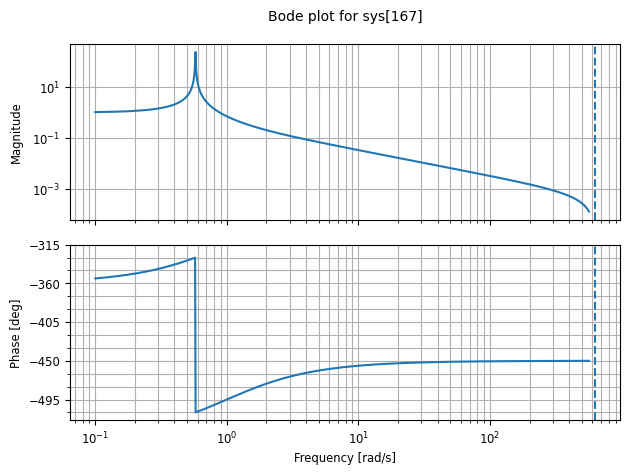

In [19]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sym

fs = 200
Ts = 1/fs

z = sym.Symbol('z')
sz = 2*(z-1)/(Ts*(z+1)) #bilinear
# usar sz para montar a expressão
Hzbi = (1000*sz + 50000)/(sz**3 + 120*sz**2 + 4400*sz + 48000)
Hzbi = sym.simplify(Hzbi) # simplificar a expressão
print(Hzbi) #plotar equação resultante da simplificação
#criar a função de transferência discreta baseada na expressão
z = ctl.tf('z')
z.dt = Ts
#copiar a simplificação para nova função de transferencia
Hzbio = (401.0*z**2 + 1.99999999999996*z - 399.0)/(480001.0*z**2 - 959998.0*z + 480001.0)
Hzbio = ctl.minreal(Hzbio) #simplificar
print(Hzbio) #apos a redução


#plotar a resposta em frequência
ctl.bode_plot(Hzbio)
plt.show()


### c) Obtenha manualmente (não usar o comando c2d) o modelo discreto com taxa de amostragem de 200Hz usando a transformação por Polos e Zeros Casados.

<TransferFunction>: sys[117]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1000 s + 5e+04
--------------------------------
s^3 + 120 s^2 + 4400 s + 4.8e+04

<TransferFunction>: sys[117]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2.491e-06 z^3 + 2.504e-06 z^2 - 2.466e-06 z - 2.479e-06
-------------------------------------------------------
          z^3 - 2.988 z^2 + 2.976 z - 0.9881

dt = 0.0001

0.0001
<TransferFunction>: sys[121]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     9.642e-06 z - 9.593e-06
----------------------------------
z^3 - 2.988 z^2 + 2.976 z - 0.9881

dt = 0.0001



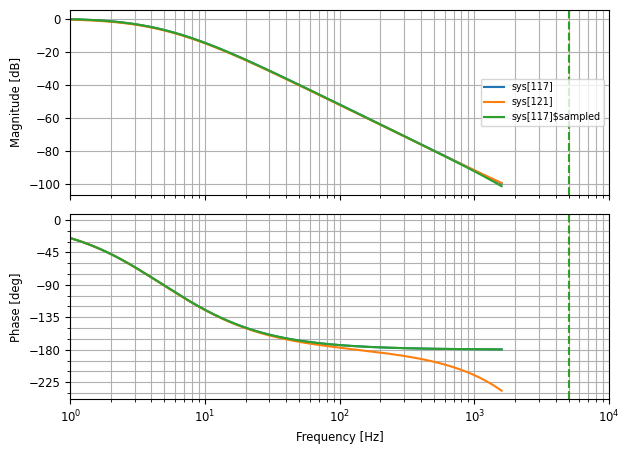

In [17]:
s = ctl.tf('s')
Hs = (1000*s + 50000)/(s**3 + 120*s**2 + 4400*s + 48000)
print(Hs)
Hz1 = ctl.c2d(Hs,1.0/10000,'bilinear') # c2d com zoh não funciona, para este caso
print(Hz1)
pi = np.pi
Ts = 1/10000
print(Ts)
polos = Hs.poles()
pz = np.exp(polos*Ts)
zeros = Hs.zeros()
zz = np.exp(zeros*Ts)
Hz = ctl.tf(np.poly(zz),np.poly(pz),Ts)
kz = abs(ctl.evalfr(Hs,1j*2*pi*1000))/abs(ctl.evalfr(Hz,np.exp(1j*2*pi*1000*Ts)))
Hz = kz*Hz
print(Hz)
fig1 = plt.figure(1)
plt.clf()
ctl.bode(Hs,dB=True,Hz=True,omega_limits=[1,1e4])
ctl.bode(Hz,dB=True,Hz=True,omega_limits=[1,1e4])
ctl.bode(Hz1,dB=True,Hz=True,omega_limits=[1,1e4])
plt.show()

### d) Coloque em um único gráfico as quatro respostas em frequência acima para comparação (do modelo contínuo e dos três discretos, com cores diferentes e legenda). Qual dos modelos discretos tem a resposta mais próxima da resposta do modelo contínuo? Justifique.
